## 3.1. Models

En esta iteración vamos a entrenar distintos tipos de modelos con los datos directos del preprocesamiento.

In [ ]:
import pandas as pd

import sys
sys.path.append("..")
from src.support_models import *

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
df = pd.read_pickle("../datos/prepped.pkl")
X = df.drop(columns=["Attrition", "EmployeeID"])
y = df["Attrition"]

In [ ]:
model = ClassificationModel(X, y)

In [ ]:
parametros_logistic =  [{'penalty': ['l1'], 'solver': ['saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
    {'penalty': ['l2'], 'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
    {'penalty': ['none'], 'solver': ['lbfgs'], 'max_iter': [10000]}]

parametros_dt = {'max_depth': [4, 10, 14, 25, 40],
            'min_samples_split': [6, 8, 10, 15, 20, 25],
            'min_samples_leaf': [6, 8, 10, 15, 20, 25],
            'max_leaf_nodes': [10, 15, 20, 25, 40, 60, 90, 110]}

parametros_rf = {
            'n_estimators' : [10,20,30,40],
            'max_depth': [5, 10, 15],
            'min_samples_split': [8, 10, 15, 20],
            'min_samples_leaf': [6, 8, 10, 15, 20],
            'max_leaf_nodes': [10, 15, 20, 25]
}

parametros_gb = {
    'n_estimators': [50,100],
    'max_depth': [3,5,7],
    'min_samples_split': [3,4,7],
    'min_samples_leaf': [3,4,7],
    'max_leaf_nodes': [6,10,12]
}

parametros_xgb = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
}

parametros_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]}



In [ ]:
model.train(model_type="logistic", scoring="f1", params=parametros_logistic, verbose=1)
model.train(model_type="decision_tree", scoring="f1", params=parametros_dt, verbose=1)
model.train(model_type="gradient_boosting", scoring="f1", params=parametros_gb, verbose=1)
model.train(model_type="xgboost", scoring="f1", params=parametros_xgb, verbose=1)
model.train(model_type="random_forest", scoring="f1", params=parametros_rf, verbose=1)
model.train(model_type="svc", scoring="f1", params=parametros_svc, verbose=1)

Fitting 5 folds for each of 43 candidates, totalling 215 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


SVC(C=100, degree=2, random_state=42)

El modelo 'svc' no soporta la función predict_proba y no se puede graficar la curva ROC.
El modelo 'svc' no soporta la función predict_proba y no se puede graficar la curva ROC.


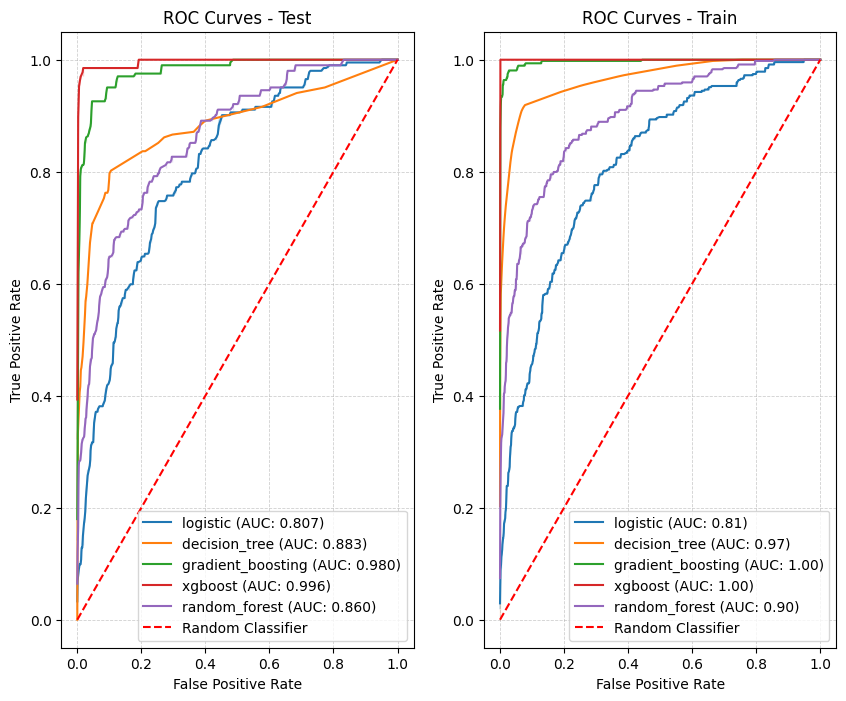

In [ ]:
model.plot_roc_curves()

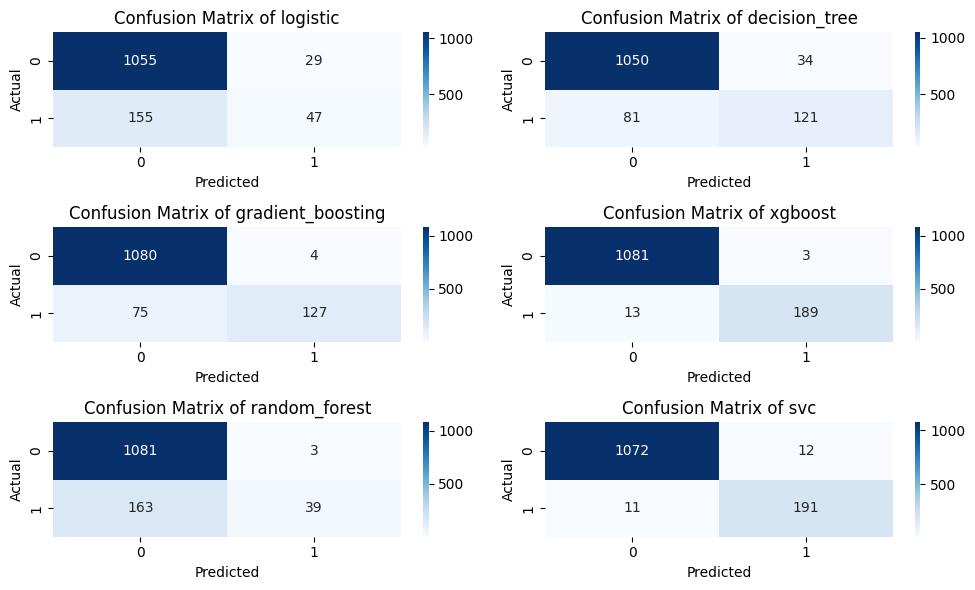

In [ ]:
model.plot_confusion_matrix()

In [ ]:
df_metrics = pd.DataFrame()
for k in model.resultados.keys():
    df_it = model.resultados[k]["metrics"]
    df_it["method"] = k
    df_metrics = pd.concat([df_metrics, df_it])

df_resultados_colores = df_metrics.copy()
df_resultados_colores.reset_index(inplace = True)
df_resultados_colores = df_resultados_colores.style.apply(color_filas_por_modelo, axis=1)
df_resultados_colores

,index,precision,accuracy,recall,f1_score,kappa,auc,time,n_jobs,method
0,train,0.687117,0.863909,0.238806,0.354430,0.297764,0.812169,0.004130,None,logistic
1,test,0.618421,0.856921,0.232673,0.338129,0.275945,0.807488,0.004130,None,logistic
2,train,0.882952,0.943963,0.739872,0.805104,0.772678,0.965091,0.002000,12,decision_tree
3,test,0.780645,0.910575,0.599010,0.677871,0.626994,0.883019,0.002000,12,decision_tree
4,train,0.994580,0.965310,0.782516,0.875895,0.856065,0.996841,0.009032,12,gradient_boosting
5,test,0.969466,0.938569,0.628713,0.762763,0.729309,0.979947,0.009032,12,gradient_boosting
6,train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.015999,None,xgboost
7,test,0.984375,0.987558,0.935644,0.959391,0.952050,0.996424,0.015999,None,xgboost
8,train,0.981651,0.878586,0.228145,0.370242,0.330755,0.897778,0.038004,-1,random_forest
9,test,0.928571,0.870918,0.193069,0.319672,0.280780,0.860386,0.038004,-1,random_forest
